In [192]:
# librairies de base
import pandas as pd
import numpy as np
import warnings
import random
pd.options.mode.chained_assignment = None
warnings.filterwarnings('ignore')
import logging
logging.disable(logging.WARNING) # disable WARNING, INFO and DEBUG logging everywhere

In [193]:
# librairies de dataviz
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
sns.set()
%matplotlib inline

In [194]:
# librairies NLP
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from keras import preprocessing
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Embedding, Flatten, Dense
import gensim
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model
import tensorflow_hub as hub
import transformers
from transformers import *

[nltk_data] Downloading package omw-1.4 to
[nltk_data]     /Users/alexandredelaguillaumie/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/alexandredelaguillaumie/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/alexandredelaguillaumie/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     /Users/alexandredelaguillaumie/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/alexandredelaguillaumie/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [195]:
# Import des librairies du fichier fonction
from functions import *

# Clustering
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
from sklearn import cluster, metrics
from sklearn import manifold, decomposition

In [196]:
# Librairies image processing
from os import listdir
from sklearn import preprocessing
from matplotlib.image import imread
import cv2
import imutils
from tensorflow.keras.utils import load_img
from tensorflow.keras.utils import img_to_array
from keras.applications.vgg16 import preprocess_input
from keras.applications.vgg16 import decode_predictions
from keras.applications.vgg16 import VGG16

In [197]:
data = pd.read_csv("flipkart_com-ecommerce_sample_1050.csv")

# TRAITEMENT DU TEXTE

# 1. Exploration de donnés

In [198]:
data.shape

(1050, 15)

In [199]:
data.columns.tolist()

['uniq_id',
 'crawl_timestamp',
 'product_url',
 'product_name',
 'product_category_tree',
 'pid',
 'retail_price',
 'discounted_price',
 'image',
 'is_FK_Advantage_product',
 'description',
 'product_rating',
 'overall_rating',
 'brand',
 'product_specifications']

In [200]:
data.head(2)

,uniq_id,crawl_timestamp,product_url,product_name,product_category_tree,pid,retail_price,discounted_price,image,is_FK_Advantage_product,description,product_rating,overall_rating,brand,product_specifications
0,55b85ea15a1536d46b7190ad6fff8ce7,2016-04-30 03:22:56 +0000,http://www.flipkart.com/elegance-polyester-mul...,Elegance Polyester Multicolor Abstract Eyelet ...,"[""Home Furnishing >> Curtains & Accessories >>...",CRNEG7BKMFFYHQ8Z,1899.0,899.0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,False,Key Features of Elegance Polyester Multicolor ...,No rating available,No rating available,Elegance,"{""product_specification""=>[{""key""=>""Brand"", ""v..."
1,7b72c92c2f6c40268628ec5f14c6d590,2016-04-30 03:22:56 +0000,http://www.flipkart.com/sathiyas-cotton-bath-t...,Sathiyas Cotton Bath Towel,"[""Baby Care >> Baby Bath & Skin >> Baby Bath T...",BTWEGFZHGBXPHZUH,600.0,449.0,7b72c92c2f6c40268628ec5f14c6d590.jpg,False,Specifications of Sathiyas Cotton Bath Towel (...,No rating available,No rating available,Sathiyas,"{""product_specification""=>[{""key""=>""Machine Wa..."


In [201]:
data.describe()

,retail_price,discounted_price
count,1049.000000,1049.000000
mean,2186.197331,1584.527169
std,7639.229411,7475.099680
min,35.000000,35.000000
25%,555.000000,340.000000
50%,999.000000,600.000000
75%,1999.000000,1199.000000
max,201000.000000,201000.000000


In [202]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1050 entries, 0 to 1049
Data columns (total 15 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   uniq_id                  1050 non-null   object 
 1   crawl_timestamp          1050 non-null   object 
 2   product_url              1050 non-null   object 
 3   product_name             1050 non-null   object 
 4   product_category_tree    1050 non-null   object 
 5   pid                      1050 non-null   object 
 6   retail_price             1049 non-null   float64
 7   discounted_price         1049 non-null   float64
 8   image                    1050 non-null   object 
 9   is_FK_Advantage_product  1050 non-null   bool   
 10  description              1050 non-null   object 
 11  product_rating           1050 non-null   object 
 12  overall_rating           1050 non-null   object 
 13  brand                    712 non-null    object 
 14  product_specifications  

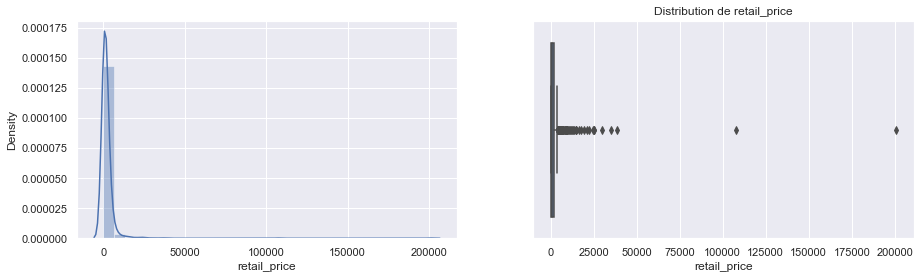

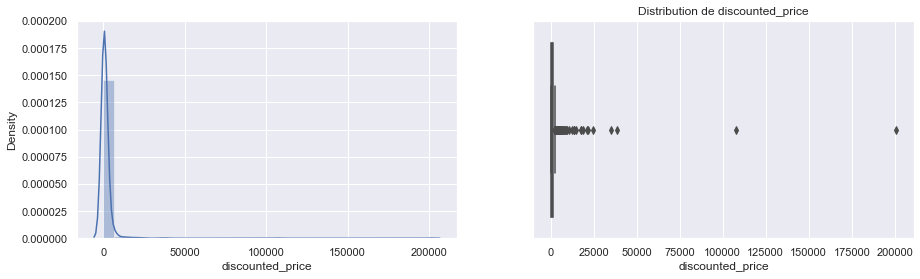

In [203]:
for cat in data.select_dtypes(['int64', 'float64']).columns:
        f, axes = plt.subplots(1,2, figsize=(15,4))
        titre = 'Distribution de ' + str(cat)
        plt.title(titre)
        sns.distplot(data[cat], bins=30, ax=axes[0])
        titre = 'Distribution de ' + str(cat)
        plt.title(titre)
        sns.boxplot(data[cat], ax=axes[1])
        plt.show()

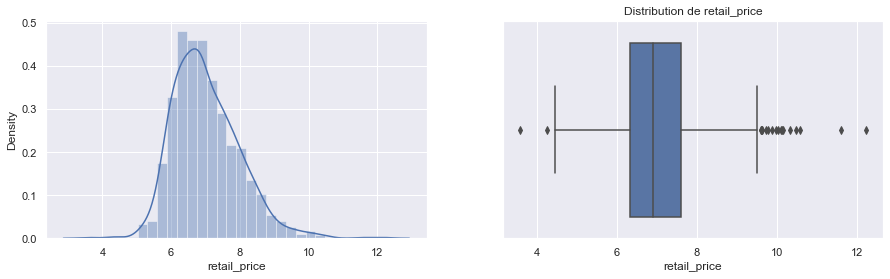

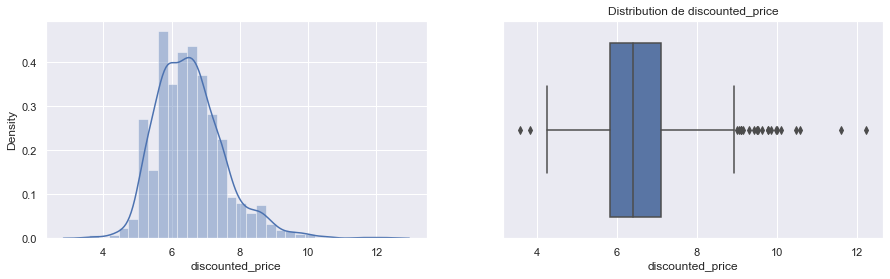

In [204]:
data[["retail_price", "discounted_price"]] = data[["retail_price", "discounted_price"]].apply(
    lambda x: np.log(1 + x))

for cat in data.select_dtypes(['int64', 'float64']).columns:
        f, axes = plt.subplots(1,2, figsize=(15,4))
        titre = 'Distribution de ' + str(cat)
        plt.title(titre)
        sns.distplot(data[cat], bins=30, ax=axes[0])
        titre = 'Distribution de ' + str(cat)
        plt.title(titre)
        sns.boxplot(data[cat], ax=axes[1])
        plt.show()

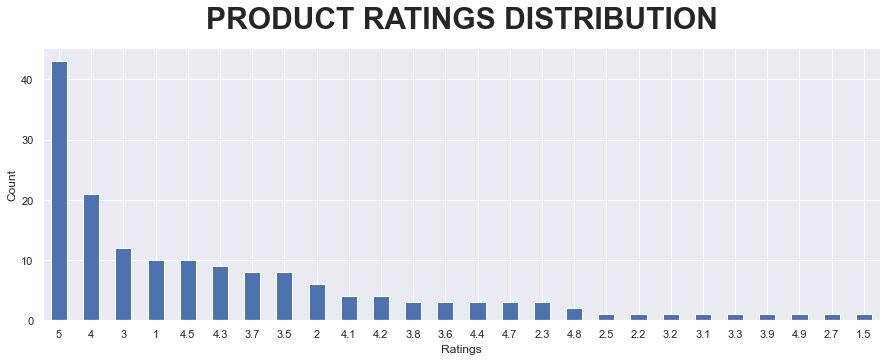

In [205]:
plt.figure(figsize=(15,5))
data[data['product_rating']!='No rating available']['product_rating'].value_counts().plot.bar()
plt.title('PRODUCT RATINGS DISTRIBUTION',
          {'fontsize':30,'fontweight': 'bold'},pad=20)
plt.ylabel('Count')
plt.xlabel('Ratings')
plt.xticks(rotation=0)
plt.show()

In [206]:
print('le dataset présente {} marques.'.format(data.brand.unique().shape[0]))

le dataset présente 491 marques.


In [207]:
print("Date du premier crawl", data['crawl_timestamp'].min())
print("Date du dernier crawl", data['crawl_timestamp'].max())

Date du premier crawl 2015-12-01 06:13:00 +0000
Date du dernier crawl 2016-06-26 14:21:24 +0000


In [208]:
# Simplifier l'identification car il y avait deja pid et uniq_id
data.sort_index(axis=0,
                ascending=True,
                inplace=True)
data.reset_index(inplace=True)
data['ID'] = data['index'].astype('str')
del data['index']
del data['uniq_id']
del data['pid']

In [209]:
data.drop(['crawl_timestamp',
           'is_FK_Advantage_product'
           ],
          axis=1,
          inplace=True)

# 2. Définition des catégories

In [212]:
data["primary_category"] = data["product_category_tree"].str.split(' >>').str[0]
data["secondary_category"] = data["product_category_tree"].str.split(' >>').str[1]
data["tertiary_category"] = data["product_category_tree"].str.split(' >>').str[2]
categories = ['primary_category','secondary_category','tertiary_category']
for col in categories:
    CategoryCleaner(data,col)

In [213]:
set(data["primary_category"])

{'Baby Care',
 'Beauty And Personal Care',
 'Computers',
 'Home Decor & Festive Needs',
 'Home Furnishing',
 'Kitchen & Dining',
 'Watches'}

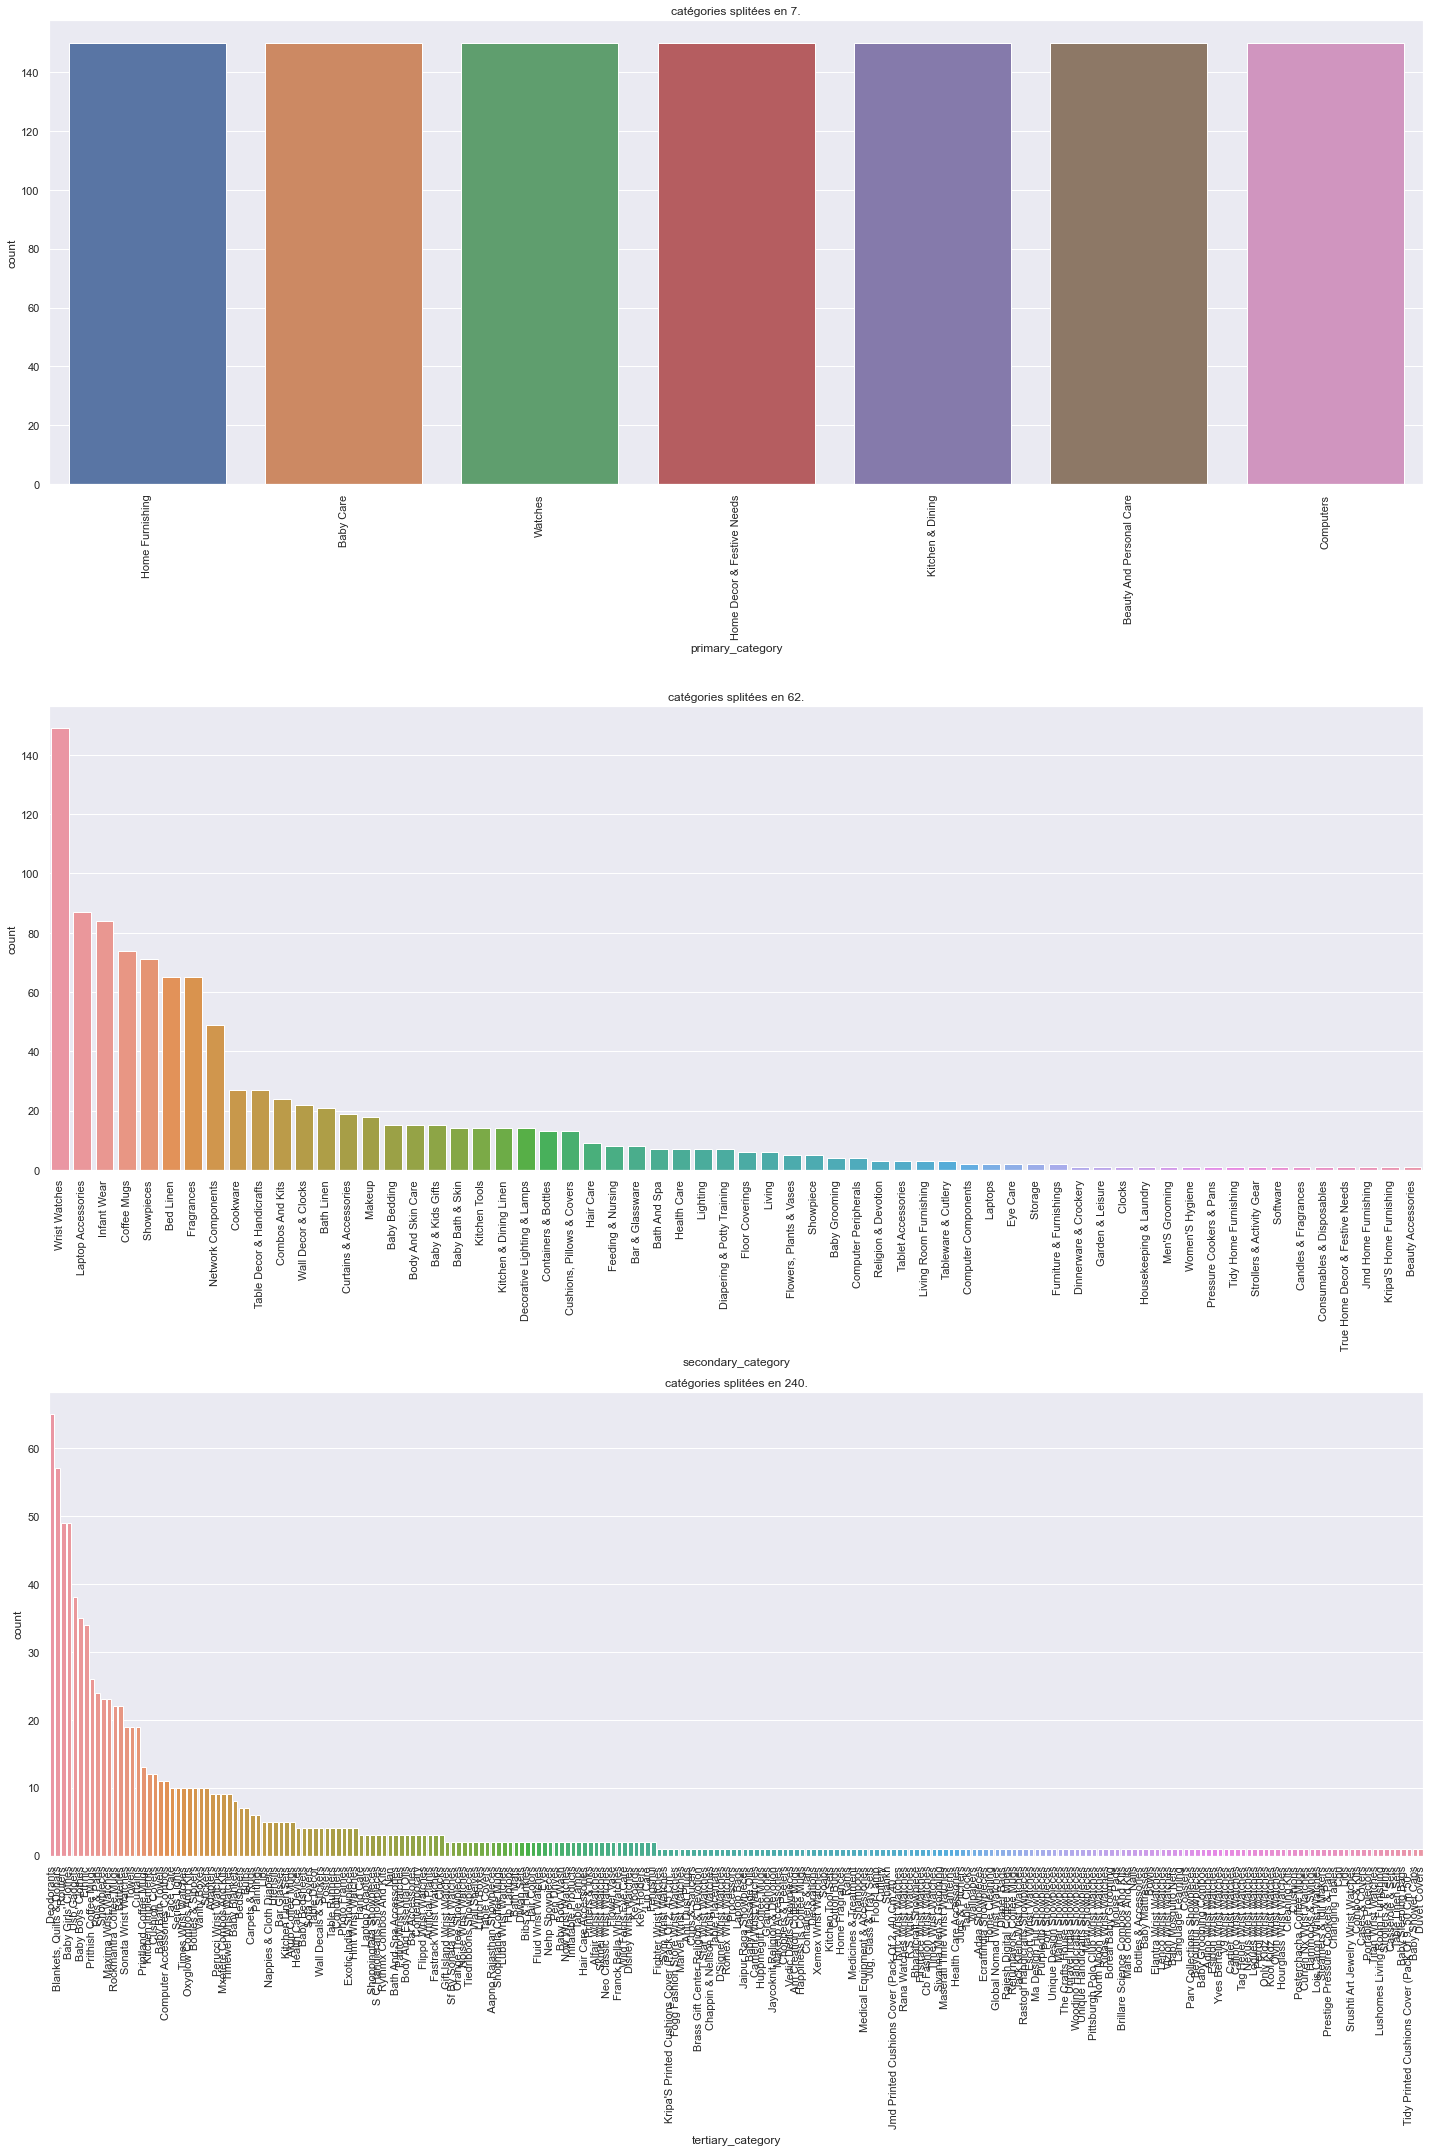

In [25]:
plt.figure(figsize=(20,30))
for col,ind in zip(categories,range(len(categories))):
    plt.subplot(3,1,ind+1)
    sns.countplot(data[col],order = data[col].value_counts().index)
    plt.xticks(rotation=90)
    plt.title('catégories splitées en {}.'.format(data[col].nunique()))
    plt.tight_layout()

# 3. Méthode Bag of words / TF-IDF

## 3.1 Préparation sentences

In [214]:
data['sentence_bow'] = data['description'].apply(lambda x : transform_bow_fct(x))
data['sentence_bow_lem'] = data['description'].apply(lambda x : transform_bow_lem_fct(x))
data['sentence_dl'] = data['description'].apply(lambda x : transform_dl_fct(x))
data.shape

(1050, 18)

In [27]:
sentences = data['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [28]:
# création du bag of words (CountVectorizer et Tf-idf)

cvect = CountVectorizer(stop_words='english', max_df=0.95, min_df=1)
ctf = TfidfVectorizer(stop_words='english', max_df=0.95, min_df=1)

feat = 'description'
cv_fit = cvect.fit(data[feat])
ctf_fit = ctf.fit(data[feat])

cv_transform = cvect.transform(data[feat])  
ctf_transform = ctf.transform(data[feat])  

In [43]:
# Liste contenant la catégorie réelle pour chaque index
l_cat = list(set(data["primary_category"])) 
y_cat_num = [(l_cat.index(data.iloc[i]["primary_category"])) for i in range(len(data))]

In [46]:
print("CountVectorizer : ")
print("-----------------")
ARI, X_tsne, labels = ARI_fct(cv_transform)
print()
print("Tf-idf : ")
print("--------")
ARI, X_tsne, labels = ARI_fct(ctf_transform)

CountVectorizer : 
-----------------
ARI :  0.3784 time :  14.0

Tf-idf : 
--------
ARI :  0.5567 time :  12.0


## 3.5 t-SNE

In [47]:
X_TSNE = TSNE().fit_transform(X_tsne)

In [48]:
X_labelised = pd.concat([pd.DataFrame(X_TSNE),pd.DataFrame(labels)],axis=1)
X_labelised = X_labelised.set_axis(['tsne1','tsne2','labels'],axis=1)

In [49]:
X_true = pd.concat([pd.DataFrame(X_TSNE),pd.DataFrame(y_cat_num)],axis=1)
X_true = X_true.set_axis(['tsne1','tsne2','labels'],axis=1)

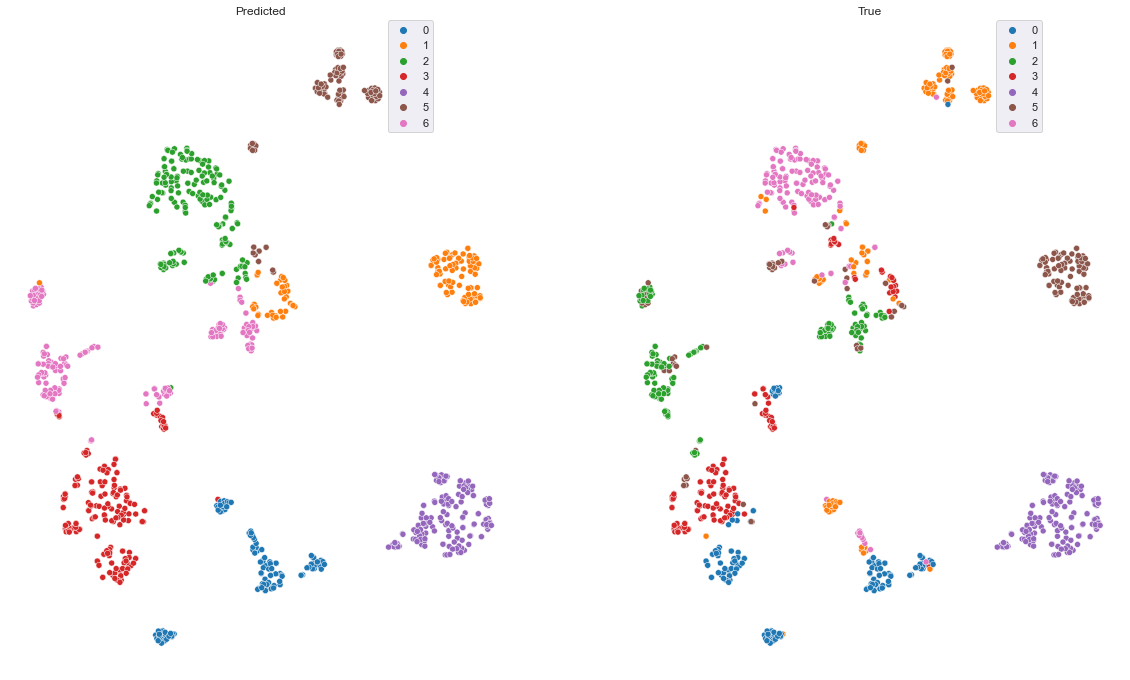

In [50]:
# Afficher en 2 dimensions les catégories prédites et réelles
f = plt.figure(figsize=(20, 12))
for df,ind,title in zip([X_labelised,X_true],range(1,3),['Predicted', 'True']):
    plt.subplot(1,2,ind)
    plt.title(title)
    sns.scatterplot(data=df, x='tsne1',y='tsne2', hue='labels',palette='tab10')
    plt.legend(bbox_to_anchor=(.75, 1), loc='upper left', borderaxespad=0)
    plt.axis('off')
    plt.axis('tight')

# 4. Méthode word2vec

## 4.1 Création du modèle Word2Vec

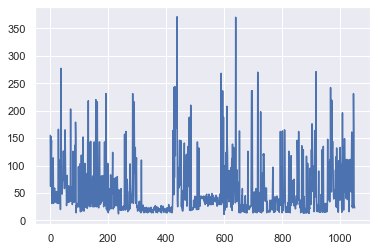

In [51]:
# Autour de 400
length_sentences = []
for sent,num in zip(sentences,range(len(sentences))):
    length_sentences.append(len(sent))
plt.plot(length_sentences)

<AxesSubplot:>

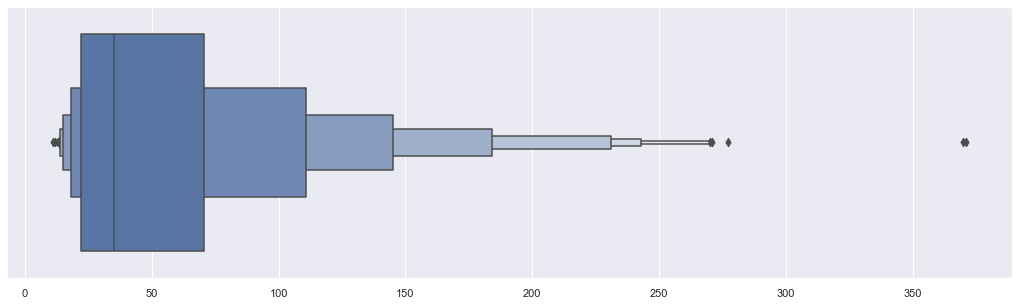

In [52]:
plt.figure(figsize=(18,5))
sns.boxenplot(length_sentences)

In [53]:
length_sentences.sort(reverse=True)
# print(length_sentences[:6])

In [54]:
max(length_sentences)

371

In [151]:
# Hyperparams

# Distance maximale entre le mot actuel et le mot prédit dans une phrase
w2v_window=5
# Ignore tous les mots avec une fréquence totale inférieure à cet hyperparamètre
w2v_min_count=1
# nombre d’itérations (époques) sur le corpus (Anciennement : iter)
w2v_epochs=485
# Taille de la dimension des vecteurs
w2v_size=550
# longueur maximale de toutes les séquences (remplies de vide à la longueur max si trop courte)
maxlen = max(length_sentences) # adapt to length of sentences

In [168]:
sentences = data['sentence_bow_lem'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [169]:
w2v_model = Word2Vec(min_count=w2v_min_count,
                     window=w2v_window,
                     vector_size=w2v_size,
                     seed=42,
                     workers=1
                     # workers=multiprocessing.cpu_count())
                     )
w2v_model.build_vocab(sentences)
w2v_model.train(sentences, total_examples=w2v_model.corpus_count, epochs=w2v_epochs)
model_vectors = w2v_model.wv
w2v_words = model_vectors.index_to_key
print("Vocabulary size: %i" % len(w2v_words))
print("Word2Vec trained")

Vocabulary size: 4712
Word2Vec trained


In [170]:
# Préparation des sentences (tokenization)

print("Fit Tokenizer ...")
tokenizer = Tokenizer()
tokenizer.fit_on_texts(sentences)

x_sentences = pad_sequences(tokenizer.texts_to_sequences(sentences),
                            maxlen=maxlen,
                            padding='post') 
                                                   
num_words = len(tokenizer.word_index) + 1
print("Number of unique words: %i" % num_words)

Fit Tokenizer ...
Number of unique words: 4713


## 4.2 Création de la matrice d'embedding

In [171]:
# Création de la matrice d'embedding

print("Create Embedding matrix ...")
word_index = tokenizer.word_index
vocab_size = len(word_index) + 1
embedding_matrix = np.zeros((vocab_size, w2v_size))
i=0
j=0
    
for word, idx in word_index.items():
    i +=1
    if word in w2v_words:
        j +=1
        embedding_vector = model_vectors[word]
        if embedding_vector is not None:
            embedding_matrix[idx] = model_vectors[word]
            
word_rate = np.round(j/i,4)
print("Word embedding rate : ", word_rate)
print("Embedding matrix: %s" % str(embedding_matrix.shape))

Create Embedding matrix ...
Word embedding rate :  1.0
Embedding matrix: (4713, 550)


## 4.3 Création du modèle d'embedding

In [172]:
# Création du modèle

input=Input(shape=(len(x_sentences),maxlen),dtype='float64')
word_input=Input(shape=(maxlen,),dtype='float64')  
word_embedding=Embedding(input_dim=vocab_size,
                         output_dim=w2v_size,
                         weights = [embedding_matrix],
                         input_length=maxlen)(word_input)
word_vec=GlobalAveragePooling1D()(word_embedding)  
embed_model = Model([word_input],word_vec)

embed_model.summary()

Model: "model_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_12 (InputLayer)       [(None, 371)]             0         
                                                                 
 embedding_4 (Embedding)     (None, 371, 550)          2592150   
                                                                 
 global_average_pooling1d_4   (None, 550)              0         
 (GlobalAveragePooling1D)                                        
                                                                 
Total params: 2,592,150
Trainable params: 2,592,150
Non-trainable params: 0
_________________________________________________________________


## 4.4 Exécution du modèle

In [173]:
embeddings = embed_model.predict(x_sentences)
embeddings.shape

33/33 [==============================] - 0s 7ms/step


(1050, 550)

In [174]:
ARI, X_tsne, labels = ARI_fct(embeddings)

ARI :  0.3613 time :  9.0


In [175]:
X_TSNE = TSNE().fit_transform(X_tsne)

In [176]:
X_labelised = pd.concat([pd.DataFrame(X_TSNE),pd.DataFrame(labels)],axis=1)
X_labelised = X_labelised.set_axis(['tsne1','tsne2','labels'],axis=1)

In [177]:
X_true = pd.concat([pd.DataFrame(X_TSNE),pd.DataFrame(y_cat_num)],axis=1)
X_true = X_true.set_axis(['tsne1','tsne2','labels'],axis=1)

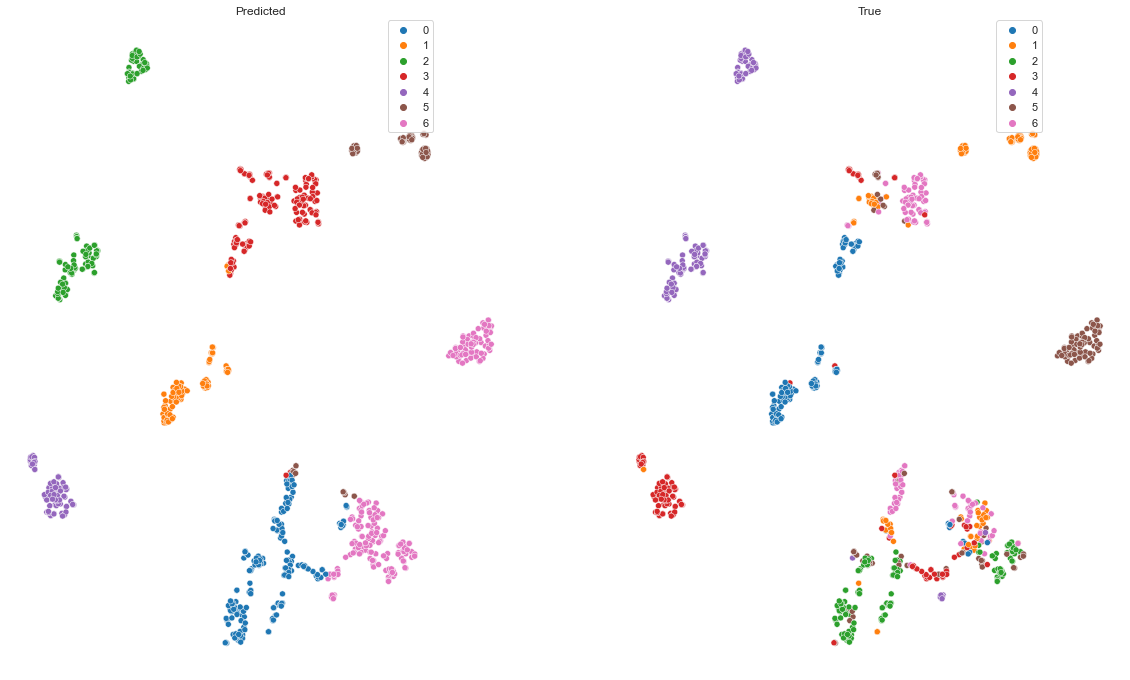

In [178]:
# Afficher en 2 dimensions les catégories prédites et réelles
f = plt.figure(figsize=(20, 12))
for df,ind,title in zip([X_labelised,X_true],range(1,3),['Predicted', 'True']):
    plt.subplot(1,2,ind)
    plt.title(title)
    sns.scatterplot(data=df, x='tsne1',y='tsne2', hue='labels',palette='tab10')
    plt.legend(bbox_to_anchor=(.75, 1), loc='upper left', borderaxespad=0)
    plt.axis('off')
    plt.axis('tight')

# 5. Méthode USE (Universal Sentance Encoder)

In [230]:
embed = hub.load("https://tfhub.dev/google/universal-sentence-encoder/4")

In [231]:
sentences = data['sentence_dl'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [233]:
batch_size = 10

In [ ]:
features_USE = feature_USE_fct(sentences, batch_size)

In [235]:
features_USE.shape

(1050, 512)

In [236]:
ARI, X_tsne, labels = ARI_fct(features_USE)

ARI :  0.454 time :  13.0


In [73]:
X_TSNE = TSNE().fit_transform(X_tsne)

In [74]:
X_labelised = pd.concat([pd.DataFrame(X_TSNE),pd.DataFrame(labels)],axis=1)
X_labelised = X_labelised.set_axis(['tsne1','tsne2','labels'],axis=1)

In [75]:
X_true = pd.concat([pd.DataFrame(X_TSNE),pd.DataFrame(y_cat_num)],axis=1)
X_true = X_true.set_axis(['tsne1','tsne2','labels'],axis=1)

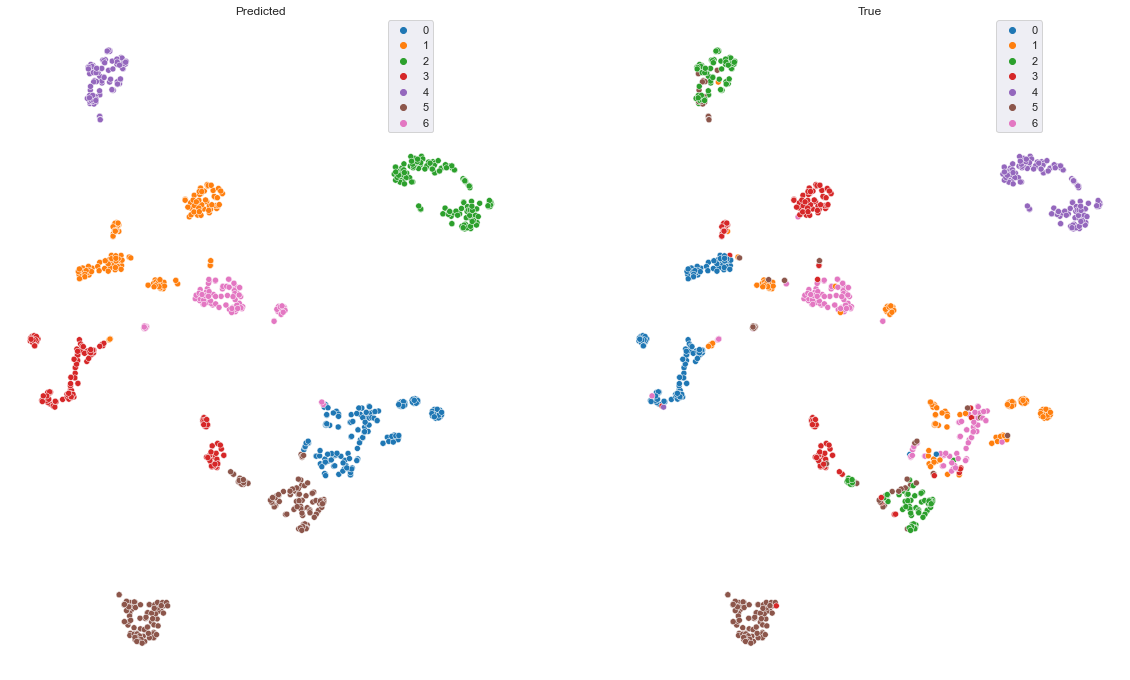

In [76]:
# Afficher en 2 dimensions les catégories prédites et réelles
f = plt.figure(figsize=(20, 12))
for df,ind,title in zip([X_labelised,X_true],range(1,3),['Predicted', 'True']):
    plt.subplot(1,2,ind)
    plt.title(title)
    sns.scatterplot(data=df, x='tsne1',y='tsne2', hue='labels',palette='tab10')
    plt.legend(bbox_to_anchor=(.75, 1), loc='upper left', borderaxespad=0)
    plt.axis('off')
    plt.axis('tight')

# 5. Méthode BERT

In [231]:
sentences = data['sentence_dl'].to_list()
sentences = [gensim.utils.simple_preprocess(text) for text in sentences]

In [78]:
# Comme pour 
max_length = max(length_sentences)
batch_size = 10
model_type = 'bert-base-uncased'
model = TFAutoModel.from_pretrained(model_type)

In [79]:
# Création des features
features_bert, last_hidden_states_tot = feature_BERT_fct(model, model_type, sentences, 
                                                         max_length, batch_size, mode='HF')

1/1 [==============================] - 6s 6s/step
temps traitement :  882.0


In [80]:
features_bert.shape

(1050, 768)

In [81]:
ARI, X_tsne, labels = ARI_fct(features_bert)

ARI :  0.2887 time :  7.0


In [82]:
X_TSNE = TSNE().fit_transform(X_tsne)

In [83]:
X_labelised = pd.concat([pd.DataFrame(X_TSNE),pd.DataFrame(labels)],axis=1)
X_labelised = X_labelised.set_axis(['tsne1','tsne2','labels'],axis=1)

In [84]:
X_true = pd.concat([pd.DataFrame(X_TSNE),pd.DataFrame(y_cat_num)],axis=1)
X_true = X_true.set_axis(['tsne1','tsne2','labels'],axis=1)

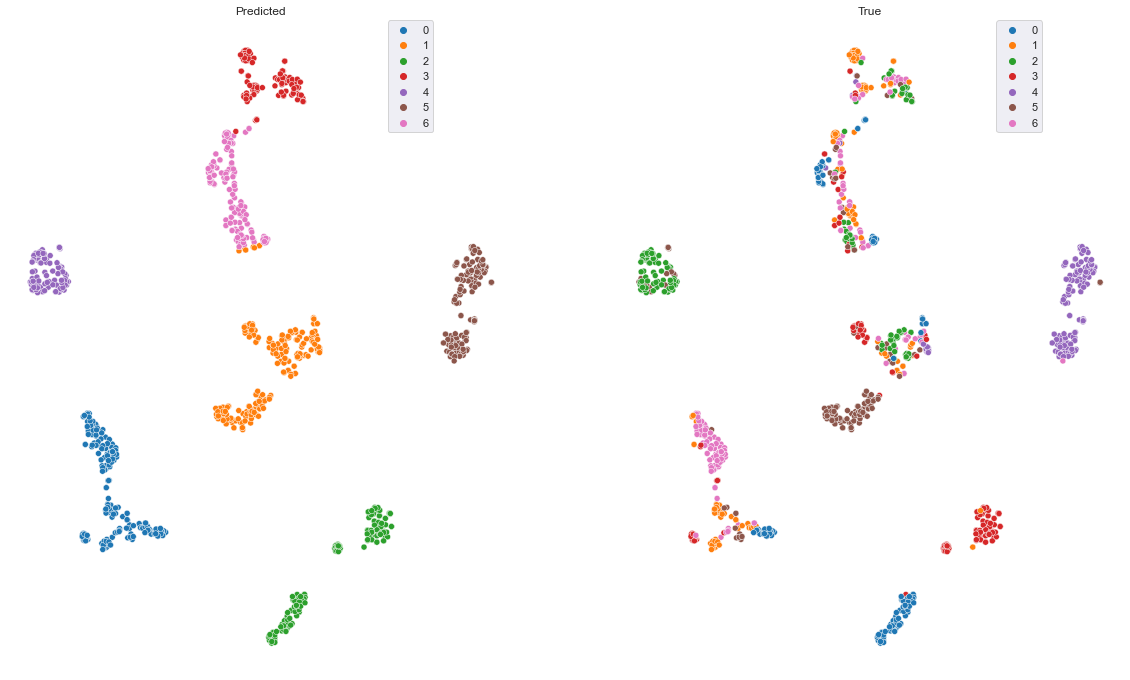

In [85]:
# Afficher en 2 dimensions les catégories prédites et réelles
f = plt.figure(figsize=(20, 12))
for df,ind,title in zip([X_labelised,X_true],range(1,3),['Predicted', 'True']):
    plt.subplot(1,2,ind)
    plt.title(title)
    sns.scatterplot(data=df, x='tsne1',y='tsne2', hue='labels',palette='tab10')
    plt.legend(bbox_to_anchor=(.75, 1), loc='upper left', borderaxespad=0)
    plt.axis('off')
    plt.axis('tight')

# TRAITEMENT DE L'IMAGE

In [86]:
path = '/Users/alexandredelaguillaumie/Jupyter/Projet 6/Images/'
list_photos = [file for file in listdir(path)]

In [87]:
print(len(list_photos))

1050


In [88]:
data_img = data[['image','primary_category']]

In [89]:
list_labels = data["primary_category"].unique()

In [90]:
le = preprocessing.LabelEncoder()
data_img["label"] = le.fit_transform(data_img["primary_category"])
data_img

,image,primary_category,label
0,55b85ea15a1536d46b7190ad6fff8ce7.jpg,Home Furnishing,4
1,7b72c92c2f6c40268628ec5f14c6d590.jpg,Baby Care,0
2,64d5d4a258243731dc7bbb1eef49ad74.jpg,Baby Care,0
3,d4684dcdc759dd9cdf41504698d737d8.jpg,Home Furnishing,4
4,6325b6870c54cd47be6ebfbffa620ec7.jpg,Home Furnishing,4
...,...,...,...
1045,958f54f4c46b53c8a0a9b8167d9140bc.jpg,Baby Care,0
1046,fd6cbcc22efb6b761bd564c28928483c.jpg,Baby Care,0
1047,5912e037d12774bb73a2048f35a00009.jpg,Baby Care,0
1048,c3edc504d1b4f0ba6224fa53a43a7ad6.jpg,Baby Care,0


In [91]:
data_img.label.nunique()

7

In [92]:
data_img.groupby("label").count()

,image,primary_category
label,,
0,150,150
1,150,150
2,150,150
3,150,150
4,150,150
5,150,150
6,150,150


In [93]:
set(data_img.label)

{0, 1, 2, 3, 4, 5, 6}

Sample category Computers :


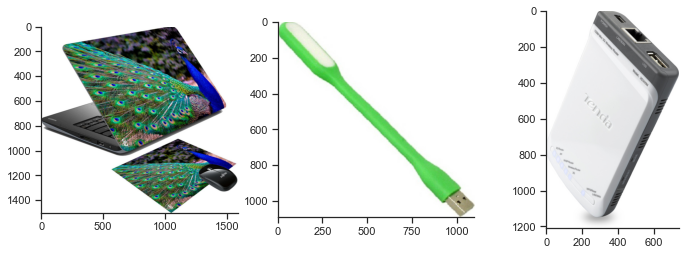

Sample category Kitchen & Dining :


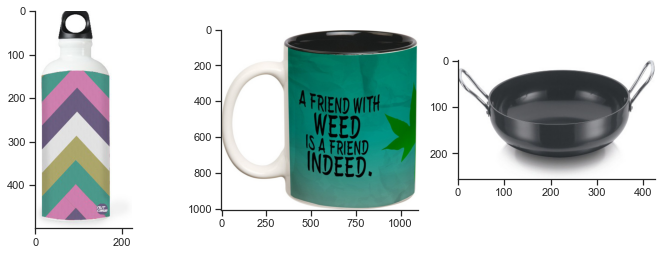

Sample category Home Furnishing :


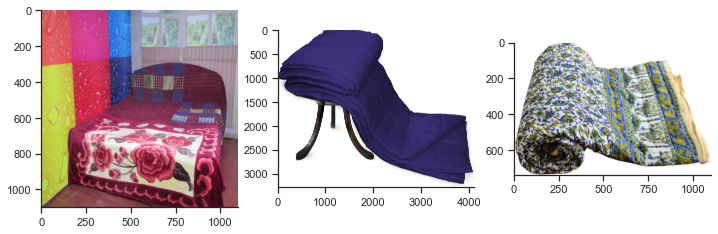

Sample category Beauty And Personal Care :


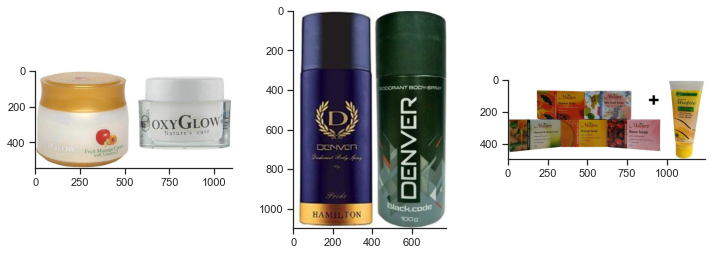

Sample category Watches :


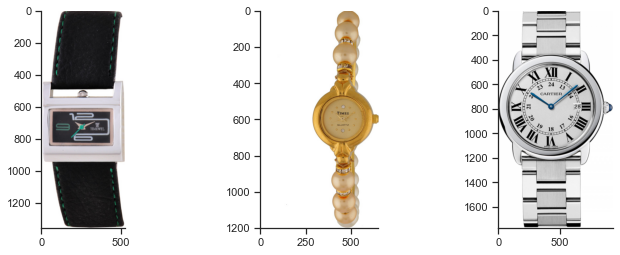

Sample category Baby Care :


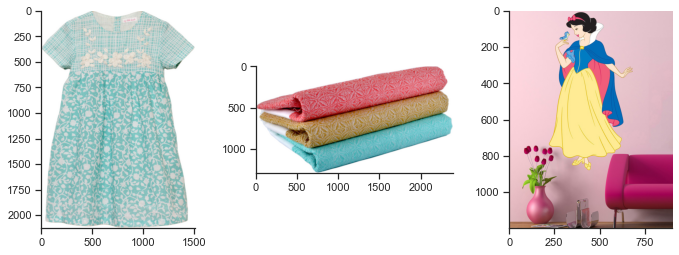

Sample category Home Decor & Festive Needs :


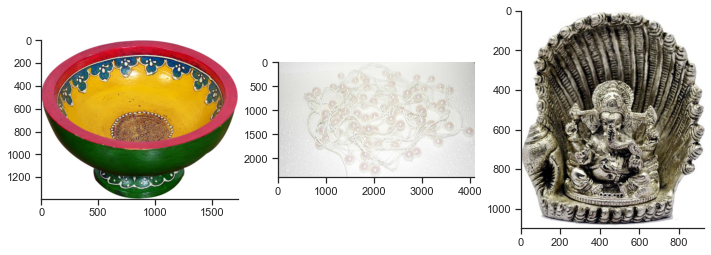

In [94]:
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)
for categ in set(data_img.primary_category):
    plt.figure(figsize=(12,4))
    print('Sample category {} :'.format(categ))
    image_sample=data_img[data_img.primary_category == categ].image.sample(3)    
    for i in range(3):
        plt.subplot(130 + 1 + i)
        filename = path + image_sample.iloc[i]
        image = imread(filename)
        plt.imshow(image)
    plt.show()

## Détermination et affichage des descripteurs SIFT

[ WARN:0@16662.848] global /Users/runner/work/opencv-python/opencv-python/opencv_contrib/modules/xfeatures2d/misc/python/shadow_sift.hpp (15) SIFT_create DEPRECATED: cv.xfeatures2d.SIFT_create() is deprecated due SIFT tranfer to the main repository. https://github.com/opencv/opencv/issues/16736


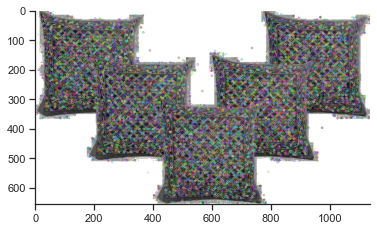

Descripteurs :  (11002, 128)

[[  0.   0.   2. ...   2.   2.  16.]
 [ 27.   2.   2. ...   0.   4.  33.]
 [139.  44.   5. ...   3.   0.   0.]
 ...
 [ 13.  21.   1. ...   0.   1.   4.]
 [  1.   3.   3. ...   0.   0.   0.]
 [ 29.  27.  11. ...   4.  26.   3.]]


In [95]:
sift = cv2.xfeatures2d.SIFT_create()
image = cv2.imread(path+list_photos[1],0) # convert in gray
image = cv2.equalizeHist(image)   # equalize image histogram
kp, des = sift.detectAndCompute(image, None)
image= cv2.drawKeypoints(image,kp,image)
plt.imshow(image)
plt.show()
print("Descripteurs : ", des.shape)
print()
print(des)

# Pré-traitement des images via SIFT

## Créations des descripteurs de chaque image
* Pour chaque image passage en gris et equalisation
* création d'une liste de descripteurs par image ("sift_keypoints_by_img") qui sera utilisée pour réaliser les histogrammes par image
* création d'une liste de descripteurs pour l'ensemble des images ("sift_keypoints_all") qui sera utilisé pour créer les clusters de descripteurs

In [96]:
sizes = []
for img in range(249):
    img = cv2.imread(path+list_photos[img])
    size = img.shape[0]*img.shape[1]
    sizes.append(size)
    
max(sizes)

17779797

In [97]:
# identification of key points and associated descriptors
sift_keypoints = []
temps1=time.time()
sift = cv2.SIFT_create(500)
large_images = [] 

for image_num in range(len(list_photos)) :
    if image_num%100 == 0 : print(image_num)
    image = cv2.imread(path+list_photos[image_num],0) # convert in gray
    if image.shape[0]*image.shape[1] > 10000000:
        # image = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
        # image = cv2.resize(image,dsize=(1000,1000),interpolation= cv2.INTER_LINEAR)
        image = imutils.resize(image, width=1000)
        large_images.append(image_num)
    res = cv2.equalizeHist(image)    # equalize image histogram
    kp, des = sift.detectAndCompute(res, None)
    sift_keypoints.append(des)

sift_keypoints_by_img = np.asarray(sift_keypoints)
sift_keypoints_all    = np.concatenate(sift_keypoints_by_img, axis=0)

print()
print("Nombre de descripteurs : ", sift_keypoints_all.shape)

duration1=time.time()-temps1
print("temps de traitement SIFT descriptor : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000

Nombre de descripteurs :  (516533, 128)
temps de traitement SIFT descriptor :           308.60 secondes


In [98]:
for i in large_images:
    image = cv2.imread(path+list_photos[i],0)
    print('Image = n° {}'.format(i),
          '\nTaille = {}M'.format(round(image.shape[0]*image.shape[1]/1e6,2)),
          '\nRatio = {}\n'.format(round(image.shape[0]/image.shape[1],2)))

Image = n° 58 
Taille = 17.78M 
Ratio = 0.57

Image = n° 71 
Taille = 11.94M 
Ratio = 0.68

Image = n° 77 
Taille = 12.21M 
Ratio = 0.96

Image = n° 132 
Taille = 13.65M 
Ratio = 0.42

Image = n° 163 
Taille = 12.96M 
Ratio = 1.0

Image = n° 170 
Taille = 13.56M 
Ratio = 0.8

Image = n° 188 
Taille = 12.42M 
Ratio = 0.72

Image = n° 249 
Taille = 93.68M 
Ratio = 1.3

Image = n° 250 
Taille = 13.05M 
Ratio = 0.47

Image = n° 251 
Taille = 11.02M 
Ratio = 0.64

Image = n° 253 
Taille = 14.53M 
Ratio = 1.0

Image = n° 281 
Taille = 12.99M 
Ratio = 0.97

Image = n° 292 
Taille = 15.27M 
Ratio = 1.0

Image = n° 297 
Taille = 11.63M 
Ratio = 0.93

Image = n° 356 
Taille = 11.64M 
Ratio = 0.67

Image = n° 370 
Taille = 17.65M 
Ratio = 0.49

Image = n° 403 
Taille = 22.12M 
Ratio = 0.67

Image = n° 494 
Taille = 13.92M 
Ratio = 1.76

Image = n° 575 
Taille = 10.73M 
Ratio = 0.69

Image = n° 603 
Taille = 11.03M 
Ratio = 0.82

Image = n° 622 
Taille = 12.92M 
Ratio = 1.43

Image = n° 635 
Taill

## Création des clusters de descripteurs
* Utilisation de MiniBatchKMeans pour obtenir des temps de traitement raisonnables

In [99]:
# Determination number of clusters
temps1=time.time()

k = int(round(np.sqrt(len(sift_keypoints_all)),0))
print("Nombre de clusters estimés : ", k)
print("Création de",k, "clusters de descripteurs ...")

# Clustering
kmeans = cluster.MiniBatchKMeans(n_clusters=k, init_size=3*k, random_state=0)
kmeans.fit(sift_keypoints_all)

duration1=time.time()-temps1
print("temps de traitement kmeans : ", "%15.2f" % duration1, "secondes")

Nombre de clusters estimés :  719
Création de 719 clusters de descripteurs ...
temps de traitement kmeans :             5.47 secondes


## Création des features des images
* Pour chaque image : 
   - prédiction des numéros de cluster de chaque descripteur
   - création d'un histogramme = comptage pour chaque numéro de cluster du nombre de descripteurs de l'image

Features d'une image = Histogramme d'une image = Comptage pour une image du nombre de descripteurs par cluster

In [100]:
# Creation of histograms (features)
temps1=time.time()

# Creation of a matrix of histograms
hist_vectors=[]

for i, image_desc in enumerate(sift_keypoints_by_img) :
    if i%100 == 0 : print(i)  
    hist = build_histogram(kmeans, image_desc, i) #calculates the histogram
    hist_vectors.append(hist) #histogram is the feature vector

im_features = np.asarray(hist_vectors)

duration1=time.time()-temps1
print("temps de création histogrammes : ", "%15.2f" % duration1, "secondes")

0
100
200
300
400
500
600
700
800
900
1000
temps de création histogrammes :             7.45 secondes


## Réductions de dimension

### Réduction de dimension PCA
* La réduction PCA permet de créer des features décorrélées entre elles, et de diminuer leur dimension, tout en gardant un niveau de variance expliquée élevé (99%)
* L'impact est une meilleure séparation des données via le T-SNE et une réduction du temps de traitement du T-SNE

In [101]:
print("Dimensions dataset avant réduction PCA : ", im_features.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(im_features)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 719)
Dimensions dataset après réduction PCA :  (1050, 501)


### Réduction de dimension T-SNE
* Réduction de dimension en 2 composantes T-SNE pour affichage en 2D des images

In [102]:
tsne = manifold.TSNE(n_components=2, perplexity=30, 
                     n_iter=2000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)

df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data_img["label"]
print(df_tsne.shape)

(1050, 3)


## Analyse visuelle : affichage T-SNE selon catégories d'images

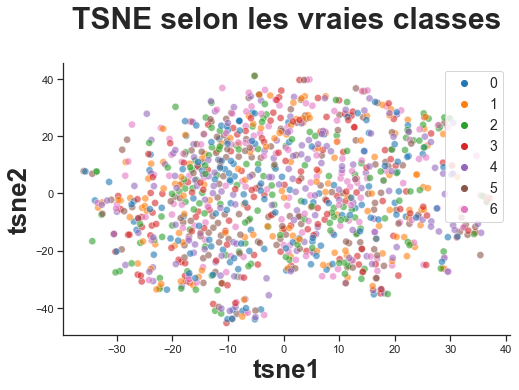

In [103]:
plt.figure(figsize=(8,5))
sns.scatterplot(
    x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

## Analyse mesures : similarité entre catégories et clusters

###  Création de clusters à partir du T-SNE

In [104]:
cls = cluster.KMeans(n_clusters=7, random_state=6)
cls.fit(X_tsne)

df_tsne["cluster"] = cls.labels_
print(df_tsne.shape)

(1050, 4)


###  Affichage des images selon clusters et calcul ARI de similarité catégories images / clusters
* Le score ARI de 0.0011 montre que le modèle est inexploitable en l'état

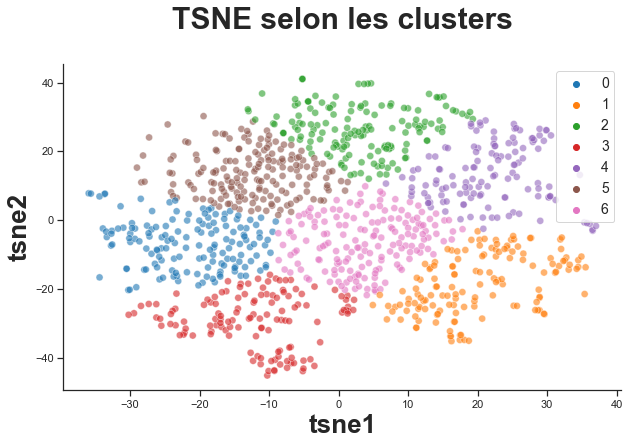

ARI :  0.0011115288734952083


In [105]:
plt.figure(figsize=(10,6))
sns.scatterplot(
    x="tsne1", y="tsne2",
    hue="cluster",
    palette=sns.color_palette('tab10', n_colors=7), s=50, alpha=0.6,
    data=df_tsne,
    legend="brief")

plt.title('TSNE selon les clusters', fontsize = 30, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 26, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 26, fontweight = 'bold')
plt.legend(prop={'size': 14}) 

plt.show()

labels = data_img["label"]
print("ARI : ", metrics.adjusted_rand_score(labels, cls.labels_))

### Analyse par classes
* La matrice de confusion doit être transformée pour mettre avoir en colonne le même ordre des catégories supposées qu'en ligne

In [106]:
df_tsne.groupby("cluster").count()["class"]

cluster
0    151
1    143
2    153
3    130
4    129
5    175
6    169
Name: class, dtype: int64

In [107]:
conf_mat = metrics.confusion_matrix(labels, cls.labels_)
print(conf_mat)

[[20 19 14 23 16 31 27]
 [24 26 27 14 17 20 22]
 [21 15 14 22 26 27 25]
 [28 18 24 21 14 19 26]
 [18 19 23 24 23 25 18]
 [24 26 19 13 14 29 25]
 [16 20 32 13 19 24 26]]


In [108]:
cls_labels_transform = conf_mat_transform(labels, cls.labels_)
conf_mat = metrics.confusion_matrix(labels, cls_labels_transform)
print(conf_mat)
print()
print(metrics.classification_report(labels, cls_labels_transform))

Correspondance des clusters :  [6, 5, 4, 3, 1, 2, 0]
[[27 16 31 23 14 19 20]
 [22 17 20 14 27 26 24]
 [25 26 27 22 14 15 21]
 [26 14 19 21 24 18 28]
 [18 23 25 24 23 19 18]
 [25 14 29 13 19 26 24]
 [26 19 24 13 32 20 16]]

              precision    recall  f1-score   support

           0       0.16      0.18      0.17       150
           1       0.13      0.11      0.12       150
           2       0.15      0.18      0.17       150
           3       0.16      0.14      0.15       150
           4       0.15      0.15      0.15       150
           5       0.18      0.17      0.18       150
           6       0.11      0.11      0.11       150

    accuracy                           0.15      1050
   macro avg       0.15      0.15      0.15      1050
weighted avg       0.15      0.15      0.15      1050



<AxesSubplot:>

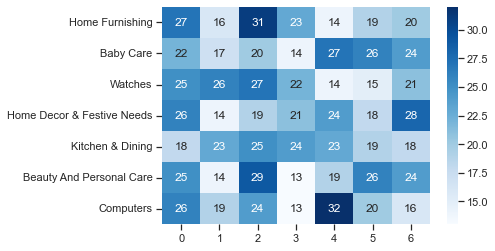

In [109]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")

# Pré-traitement des images via CNN / Transfer Learning

In [110]:
# load model
model = VGG16()
# summarize the model
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [111]:
# Créer un path
data_img['path'] = path + data_img['image'].values

In [112]:
# Exemple pour une image

# load an image from file
image = load_img(data_img['path'][0], target_size=(224, 224))
# convert the image pixels to a numpy array
image = img_to_array(image)
# reshape data for the model
image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))
# prepare the image for the VGG model
image = preprocess_input(image)
# load the model
model = VGG16()
# predict the probability across all output classes
yhat = model.predict(image)
# convert the probabilities to class labels
label = decode_predictions(yhat)
# retrieve the most likely result, e.g. highest probability
label = label[0][0]
# print the classification
print('%s (%.2f%%)' % (label[1], label[2]*100))

1/1 [==============================] - 1s 584ms/step
four-poster (36.77%)


In [113]:
# Appliqué à toutes les images
vgg_keypoints = []
temps1=time.time()

for image_num in range(len(data_img['path'])) :
    if image_num%100 == 0 : print(image_num)
    image = load_img(data_img['path'][image_num], target_size=(224, 224))  # Charger l'image
    image = img_to_array(image)  # Convertir en tableau numpy
    image = image.reshape((1, image.shape[0], image.shape[1], image.shape[2]))  # Créer la collection d'images (un seul échantillon)
    image = preprocess_input(image)

    des = model.predict(image).reshape(-1)
    vgg_keypoints.append(des)

img_feat = pd.Series(vgg_keypoints)

duration1=time.time()-temps1
print("temps de traitement vgg descriptor : ", "%15.2f" % duration1, "secondes")

0
1/1 [==============================] - 0s 240ms/step
100
1/1 [==============================] - 0s 233ms/step
200
1/1 [==============================] - 0s 231ms/step
300
1/1 [==============================] - 0s 235ms/step


1/1 [==============================] - 0s 233ms/step
400
1/1 [==============================] - 0s 233ms/step
500
1/1 [==============================] - 0s 236ms/step
600
1/1 [==============================] - 0s 238ms/step


1/1 [==============================] - 0s 233ms/step
700
1/1 [==============================] - 0s 232ms/step
800
1/1 [==============================] - 0s 231ms/step
900
1/1 [==============================] - 0s 236ms/step


1/1 [==============================] - 0s 245ms/step
1000
1/1 [==============================] - 0s 240ms/step
temps de traitement vgg descriptor :           314.84 secondes


In [114]:
X_df = pd.DataFrame.from_dict(dict(zip(img_feat.index, img_feat.values))).T
X_df.shape

(1050, 1000)

In [116]:
print("Dimensions dataset avant réduction PCA : ", X_df.shape)
pca = decomposition.PCA(n_components=0.99)
feat_pca= pca.fit_transform(X_df)
print("Dimensions dataset après réduction PCA : ", feat_pca.shape)

Dimensions dataset avant réduction PCA :  (1050, 1000)
Dimensions dataset après réduction PCA :  (1050, 202)


In [117]:
kmeans = KMeans(n_clusters=7, random_state=6, init='k-means++', n_init=10, max_iter=1000)
X_kmean = kmeans.fit_transform(X_df)
y_pred = pd.Series(kmeans.labels_)
y_true = data_img['label']

In [118]:
tsne = manifold.TSNE(n_components=2,perplexity=25, n_iter=1000, init='random', random_state=6)
X_tsne = tsne.fit_transform(feat_pca)
X_kmean_tsne = kmeans.fit_transform(X_tsne)
y_pred = pd.Series(kmeans.labels_)
df_tsne = pd.DataFrame(X_tsne[:,0:2], columns=['tsne1', 'tsne2'])
df_tsne["class"] = data["primary_category"]
df_tsne["kmeans_tsne"] = y_pred

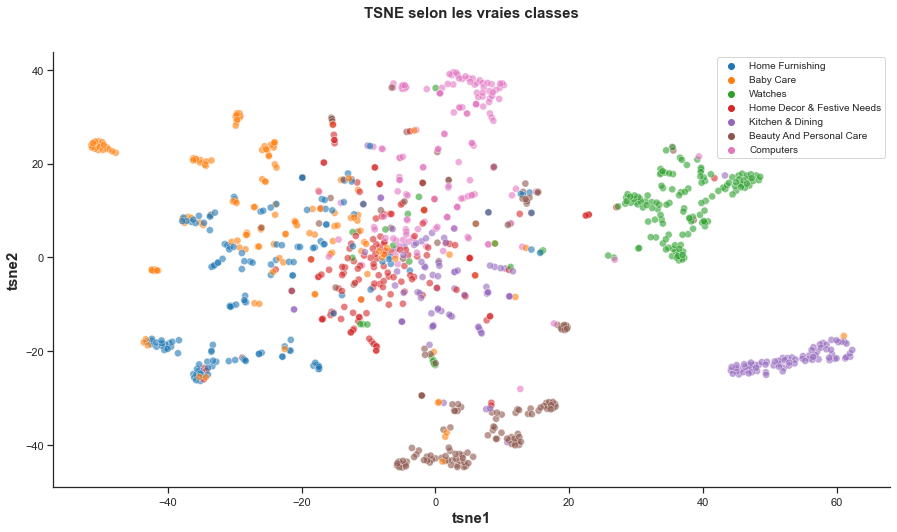

In [119]:
# t-SNE
plt.figure(figsize=(15,8))
sns.scatterplot(
  x="tsne1", y="tsne2", hue="class", data=df_tsne, legend="brief",
  palette=sns.color_palette('tab10',n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon les vraies classes', fontsize = 15, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.show()

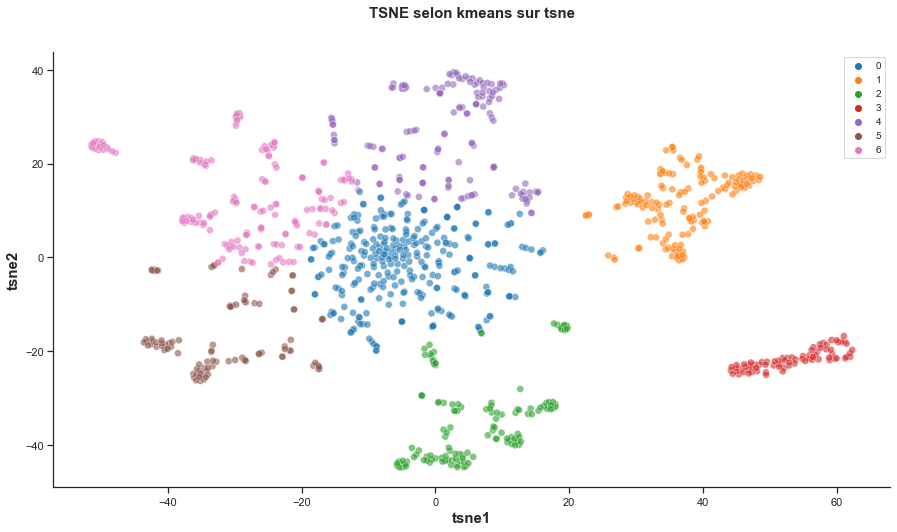

In [120]:
plt.figure(figsize=(15,8))
sns.scatterplot(
  x="tsne1", y="tsne2", hue="kmeans_tsne", data=df_tsne, legend="brief",
  palette=sns.color_palette('tab10',n_colors=7), s=50, alpha=0.6)

plt.title('TSNE selon kmeans sur tsne', fontsize = 15, pad = 35, fontweight = 'bold')
plt.xlabel('tsne1', fontsize = 15, fontweight = 'bold')
plt.ylabel('tsne2', fontsize = 15, fontweight = 'bold')
plt.legend(prop={'size': 10}) 

plt.show()

In [121]:
# Score final
print("ARI avec t-SNE : ", metrics.adjusted_rand_score(y_true, y_pred))

ARI avec t-SNE :  0.39082431742750834


In [122]:
df_tsne.groupby("kmeans_tsne").count()["class"]

kmeans_tsne
0    294
1    142
2    131
3     76
4    147
5    101
6    159
Name: class, dtype: int64

In [123]:
conf_mat = metrics.confusion_matrix(labels, kmeans.labels_)
print(conf_mat)

[[ 30   0   6   1   2  15  96]
 [ 13   2 109   0  20   1   5]
 [ 40   3   2   0 102   0   3]
 [115   6   2   0  15   8   4]
 [ 19   0   0   0   5  75  51]
 [ 64   1   7  75   1   2   0]
 [ 13 130   5   0   2   0   0]]


<AxesSubplot:>

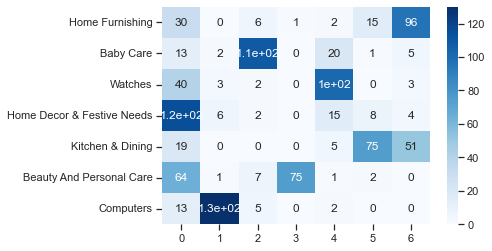

In [124]:
df_cm = pd.DataFrame(conf_mat, index = [label for label in list_labels],
                  columns = [i for i in "0123456"])
plt.figure(figsize = (6,4))
sns.heatmap(df_cm, annot=True, cmap="Blues")